#1. 데이터 셋 얻기

In [2]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17473536/17464789 [==============================] - 1s 0us/step


> num_words=10000은 훈련 데이터에서 가장 자주 나타나는 단어 1000개만 사용하겠다는 의미이다. 즉, 드물게 나타나는 단어는 무시하기 위해 사용한다.

In [3]:
print(train_data[0])
print(train_labels[:10])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
[1 0 0 1 0 0 1 0 1 0]


> data는 리뷰를 의미하며 labels는 1인 경우 긍정 0인 경우 부정을 뜻한다.

#2. 리뷰 확인

##2.1 리뷰 인덱스 얻기
> imdb에 별도로 저장되어 잇는 word index정보 얻기

In [4]:
word_index = imdb.get_word_index()
word_index

1654784/1641221 [==============================] - 0s 0us/step


{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

##2.2 인덱스 검색을 위한 치환
> 데이터셋이 index 정보로 이루어져 있어 key와 value를 치환한다.

In [5]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
reverse_word_index

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [6]:
for i in range(10):
  print(i, ' : ', reverse_word_index.get(i))

0  :  None
1  :  the
2  :  and
3  :  a
4  :  of
5  :  to
6  :  is
7  :  br
8  :  in
9  :  it


> 0의 None은 데이터가 존재하지 않기 떄문에 None으로 표현한 것이다.

##2.3 리뷰 디코딩
> 리뷰의 index정보 0, 1, 2는 '패딩', '문서시작', '사전에 없음'으로 미리 예약되어 있는 index이기 대문에 초기값이 3으로 시작해야 한다.

> 위의 index 정보에서 1이 the로 사용되는데, 여기에 3을 더한 4가 실제 index정보가 된다.

In [7]:
for i in train_data[0]:
  print(i-3, ' : ', reverse_word_index.get(i-3))

-2  :  None
11  :  this
19  :  film
13  :  was
40  :  just
527  :  brilliant
970  :  casting
1619  :  location
1382  :  scenery
62  :  story
455  :  direction
4465  :  everyone's
63  :  really
3938  :  suited
1  :  the
170  :  part
33  :  they
253  :  played
2  :  and
22  :  you
97  :  could
40  :  just
835  :  imagine
109  :  being
47  :  there
667  :  robert
-1  :  None
6  :  is
32  :  an
477  :  amazing
281  :  actor
2  :  and
147  :  now
1  :  the
169  :  same
109  :  being
164  :  director
-1  :  None
333  :  father
382  :  came
36  :  from
1  :  the
169  :  same
4533  :  scottish
1108  :  island
14  :  as
543  :  myself
35  :  so
10  :  i
444  :  loved
1  :  the
189  :  fact
47  :  there
13  :  was
3  :  a
144  :  real
2022  :  connection
16  :  with
11  :  this
19  :  film
1  :  the
1917  :  witty
4610  :  remarks
466  :  throughout
1  :  the
19  :  film
68  :  were
84  :  great
9  :  it
13  :  was
40  :  just
527  :  brilliant
35  :  so
73  :  much
12  :  that
10  :  i
1244  : 

In [8]:
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

#3. 벡터 변환
> 신경망에서는 리스트를 텐서로 변환하여 사용해야 하며 다음과 같은 두 가지 방법으로 변환할 수 있다.
- 같은 길이가 되도록 리스트에 패딩을 추가하고 (samples, sequence_length)크기의 정수 텐서로 변환한다. 그 다음 이 정수 텐서를 다룰 수 있는 layer를 신경망의 첫 번쨰 layer로 사용한다.
- 리스트를 원-핫 인코딩으로 변환한다. 그 다음 부동 소수 벡터 데이터를 다룰 수 있는 Dense layer를 신경망의 첫 layer로 사용한다.

In [9]:
 import numpy as np
 def vectorize_sequences(sequences, dimension=10000):
   #25000, 10000의 벡터 텐서 생성
   results = np.zeros((len(sequences), dimension))

   for i, sequence in enumerate(sequences):
     results[i, sequence] =1.
   
   return results

In [10]:
X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)
X_train[0, :10]

array([0., 1., 1., 0., 1., 1., 1., 1., 1., 1.])

In [11]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')
y_train[:10]

array([1., 0., 0., 1., 0., 0., 1., 0., 1., 0.], dtype=float32)

4. 모델 만들기

In [12]:
from keras import models
from keras import layers
model = models.Sequential()

#10000개의 feature로 이루어진 입력 데이터를 relu 확성 함수를 이용하여 16개의 은닉 유닛을 만든다.
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))

#두번째 kayer에서는 첫 번쨰 layer에서 input_shape을 사용햇음으로 생략한 것이다.
model.add(layers.Dense(16, activation='relu'))

#최종 layer는 긍정, 부정의 결과를 얻게 됨으로 sigmoid함수를 이용했다.
model.add(layers.Dense(1, activation='sigmoid'))

#5. 컴파일

> 아래 3가지 방법이 같은 결과로 나온다.

In [13]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [14]:
#from keras import optimizers
#model.compile(optimizer=optimizers.RMSprops(learning_rate=0.001),
#              loss='binary_crossentropy',
#              metrics=['accuracy'])

In [15]:
#from keras import optimizers
#from keras import metrics
#from keras import losses

#model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
#              loss=losses.binary_crossentropy,
#              metrics=[metrics.binary_crossentropy])

#6. 훈련 검증
> 모델의 성능을 확인하기 위해 간단하게 검증을 진행할 것이다.

##6.1 데이터 분리

In [16]:
validate_X_train = X_train[:10000]
validate_y_train = y_train[:10000]

partial_X_train = X_train[10000:]
partial_y_train = y_train[10000:]

> 총 25000개의 리뷰를 검증을 위한 10000개, 훈련을 위한 15000개로 분리한다.

##6.2 컴파일 만들기

In [17]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

##6.3 학습 시키기

In [18]:
#model.fit(
    # 학습 데이터
#    partial_X_train, partial_y_train,

    #batch_size는 한 번 실행 시 사용할 데이터의 개수이며, 여기서는 512개의 리뷰를 사용했다.
    #epochs는 모델을 학습시키기 위한 반복 횟수를 의미한다. batch_size를 하나의 묶음으로 모델을 학습 시킨다.
#    epochs=2, batch_size=512
#)

##6.4 검증하기

In [19]:
#model.fit(
#    partial_X_train, partial_y_train,
#    epochs=2, batch_size=512,

    # epoch가 끝난 이후 아래의 검증 데이터로 모델을 검증한다.
    # val_loss: 0.3236 - val_acc: 0.8706형식으로 검증 결과를 확인할 수 있다.
#    validation_data=(validate_X_train, validate_y_train)
#)

##6.5 GPU 사용하기

In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()

if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')

print('Found GPU at : ', device_name)

Found GPU at :  /device:GPU:0


> GPU를 찾을 수 없어 에러가 나온다.

> 설정에서 코랩을 GPU사용으로 설정은 바꾼다.

In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()

if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')

print('Found GPU at : ', device_name)

Found GPU at :  /device:GPU:0


> 현재 GPU가 사용가능한지 확인한다.

In [ ]:
#GPU를 이용하여면 다음 코드 이후에 작성된 코드만 GPU를 사용하게 된다.
with tf.device('device:GPU:0'):
  model.fit(
      partial_X_train, partial_y_train,
      epochs=20, batch_size=512,
      validation_data=(validate_X_train, validate_y_train)
  )

Epoch 1/20
30/30 [==============================] - 2s 42ms/step - loss: 0.5335 - acc: 0.7833 - val_loss: 0.4127 - val_acc: 0.8601
Epoch 2/20
30/30 [==============================] - 1s 19ms/step - loss: 0.3225 - acc: 0.8995 - val_loss: 0.3267 - val_acc: 0.8729
Epoch 3/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2334 - acc: 0.9241 - val_loss: 0.2793 - val_acc: 0.8919
Epoch 4/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1844 - acc: 0.9395 - val_loss: 0.2737 - val_acc: 0.8919
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1484 - acc: 0.9541 - val_loss: 0.2882 - val_acc: 0.8864
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1248 - acc: 0.9607 - val_loss: 0.3017 - val_acc: 0.8862
Epoch 7/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1023 - acc: 0.9704 - val_loss: 0.3134 - val_acc: 0.8839
Epoch 8/20
30/30 [==============================] - 1s 19ms/step - loss: 0.0845 - a

In [20]:
history = model.fit(
      partial_X_train, partial_y_train,
      epochs=20, batch_size=512,
      #epoch가 끝난 이후 아래의 검증 데이터로 모델을 검증한다.
      #val_loss : 0.2740 - val_acc: 0.8899 형식으로 검증 결과를 확인할 수 있다.
      validation_data=(validate_X_train, validate_y_train)
  )

Epoch 1/20
30/30 [==============================] - 5s 39ms/step - loss: 0.5079 - acc: 0.7727 - val_loss: 0.3803 - val_acc: 0.8502
Epoch 2/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2889 - acc: 0.9059 - val_loss: 0.3055 - val_acc: 0.8821
Epoch 3/20
30/30 [==============================] - 1s 17ms/step - loss: 0.2138 - acc: 0.9287 - val_loss: 0.2874 - val_acc: 0.8861
Epoch 4/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1656 - acc: 0.9467 - val_loss: 0.2774 - val_acc: 0.8912
Epoch 5/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1338 - acc: 0.9576 - val_loss: 0.2918 - val_acc: 0.8883
Epoch 6/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1138 - acc: 0.9644 - val_loss: 0.3003 - val_acc: 0.8853
Epoch 7/20
30/30 [==============================] - 1s 18ms/step - loss: 0.0930 - acc: 0.9718 - val_loss: 0.3409 - val_acc: 0.8761
Epoch 8/20
30/30 [==============================] - 1s 18ms/step - loss: 0.0763 - a

##6.6 차트를 통한 결과 확인

In [21]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

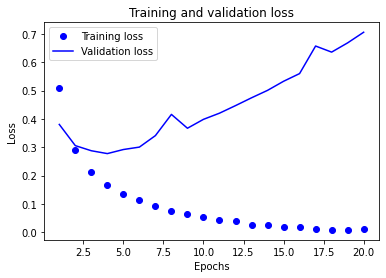

In [23]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

> 4번째 epoch까지는 훈련데이터와 검증데이터의 손실 수치가 낮아지지만 그 이후에는 검증 데이터의 손실 수치가 다시 올라가고 있다. 이러한 경우를 훈련데이터에 과적합 되었다고 표현한다.

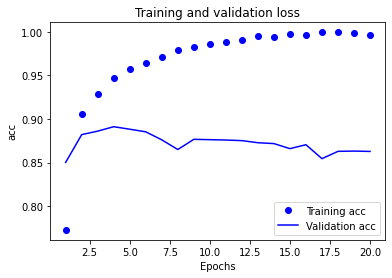

In [24]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1,len(loss)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()

plt.show()

##6.7 평가하기

In [ ]:
results = model.evaluate(X_test, y_test)
results

782/782 [==============================] - 2s 2ms/step - loss: 0.7674 - acc: 0.8497


[0.7673876285552979, 0.8496800065040588]

#7. 모델 다시 만들기

> [0.7673876285552979, 0.8496800065040588]

##7.1 데이터셋 얻기

In [ ]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

##7.2 벡터 변환

In [ ]:
 import numpy as np
 def vectorize_sequences(sequences, dimension=10000):
   #25000, 10000의 벡터 텐서 생성
   results = np.zeros((len(sequences), dimension))

   for i, sequence in enumerate(sequences):
     results[i, sequence] =1.
   
   return results

In [ ]:
X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)
X_train[0, :10]

array([0., 1., 1., 0., 1., 1., 1., 1., 1., 1.])

In [ ]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')
y_train[:10]

array([1., 0., 0., 1., 0., 0., 1., 0., 1., 0.], dtype=float32)

##7.3 데이터 분리

In [ ]:
validate_X_train = X_train[:10000]
validate_y_train = y_train[:10000]

partial_X_train = X_train[10000:]
partial_y_train = y_train[10000:]

##7.4 모델 컴파일

In [ ]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

##7.5 학습 시키기

In [ ]:
with tf.device('device:GPU:0'):
  model.fit(
      partial_X_train, partial_y_train,
      epochs=4, batch_size=512,
      validation_data=(validate_X_train, validate_y_train)
  )

Epoch 1/4
30/30 [==============================] - 2s 47ms/step - loss: 0.5138 - accuracy: 0.7879 - val_loss: 0.3945 - val_accuracy: 0.8577
Epoch 2/4
30/30 [==============================] - 1s 21ms/step - loss: 0.3040 - accuracy: 0.9007 - val_loss: 0.3020 - val_accuracy: 0.8876
Epoch 3/4
30/30 [==============================] - 1s 20ms/step - loss: 0.2194 - accuracy: 0.9285 - val_loss: 0.2926 - val_accuracy: 0.8807
Epoch 4/4
30/30 [==============================] - 1s 19ms/step - loss: 0.1755 - accuracy: 0.9418 - val_loss: 0.2999 - val_accuracy: 0.8779


##7.6 평가하기

In [ ]:
results = model.evaluate(X_test, y_test)
results

782/782 [==============================] - 2s 3ms/step - loss: 0.3256 - accuracy: 0.8690


[0.32557788491249084, 0.8689600229263306]

#8. layer 조절

> layer의 개수 가감, 수치 가감



In [ ]:
import numpy as np
from keras.datasets import imdb
import matplotlib.pyplot as plt
import tensorflow as tf

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
  #25000, 10000의 벡터 텐서 생성
  results = np.zeros((len(sequences), dimension))

  for i, sequence in enumerate(sequences):
    results[i, sequence] =1.
  
  return results

17473536/17464789 [==============================] - 0s 0us/step


In [ ]:
X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

validate_X_train = X_train[:10000]
validate_y_train = y_train[:10000]

partial_X_train = X_train[10000:]
partial_y_train = y_train[10000:]

from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(
    partial_X_train, partial_y_train,
    epochs=4, batch_size=512,
    validation_data=(validate_X_train, validate_y_train)
)

results = model.evaluate(X_test, y_test)
results

Epoch 1/4
30/30 [==============================] - 3s 66ms/step - loss: 0.5108 - accuracy: 0.7820 - val_loss: 0.3608 - val_accuracy: 0.8731
Epoch 2/4
30/30 [==============================] - 1s 38ms/step - loss: 0.2759 - accuracy: 0.9063 - val_loss: 0.2855 - val_accuracy: 0.8907
Epoch 3/4
30/30 [==============================] - 1s 38ms/step - loss: 0.2005 - accuracy: 0.9299 - val_loss: 0.2738 - val_accuracy: 0.8910
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.3476 - accuracy: 0.8610


[0.3476285934448242, 0.8610000014305115]

> 16 * 1 = [0.2939908504486084, 0.8838800191879272]

>16*2 = [0.29120638966560364, 0.8829200267791748]

> 16 * 3 = [0.3181267976760864, 0.8720399737358093]

> 32 * 1  =[0.29459434747695923, 0.8814799785614014]

> 32 * 2 = [0.3476285934448242, 0.8610000014305115]